CSU DSCI 369 Lab 4
Instructor: Emily J. King
Spring 2024

Goals: See how basic linear algebra operations affect digital images. Start playing around with matrix-vector multiplication.

Additional files needed: petedog-lab.png and lineum-lab.png in the same folder as this ipynb file or the path.
Also have DSCI369_Sp24_Lab2.pdf from lab 2 handy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Importing images.  

It's possible to use your own images by changing out the filename.  A few things to note
1. Matplotlib now suggests using a different command, but then you will need to install an additional package. https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open
In any case, plt.imread still works.  
2. If you want to compute linear combinations of your own images, make sure that they are the same size.  It's possible to crop the images in Python so that they are the same size.  (See, e.g., Lab 1.)

In [2]:
P=plt.imread('petedog-lab.png')
L=plt.imread('lineum-lab.png')

Visualizing the images.

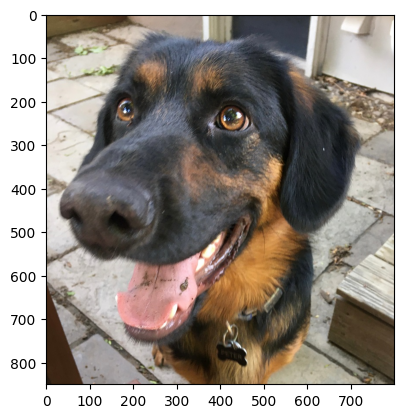

In [3]:
plt.imshow(P)


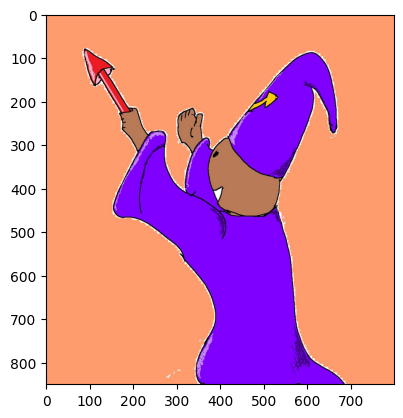

In [4]:
plt.imshow(L)

Looking at the format of the arrays.

In [5]:
print("Pete Dog's picture's array shape is",P.shape,"with entries of type",P.dtype)
print("Lineum's picture's array shape is",L.shape,"with entries of type",L.dtype)

Pete Dog's picture's array shape is (850, 800, 3) with entries of type float32
Lineum's picture's array shape is (850, 800, 3) with entries of type float32


The fact that the entries are floats tells us that the values are between 0 and 1.  Let's check.

In [6]:
print("The maximum value of Pete Dog's picture's array is",np.max(P),"while the minimum is",np.min(P),".")
print("The maximum value of Lineum's picture's array is",np.max(L),"while the minimum is",np.min(L),".")

The maximum value of Pete Dog's picture's array is 1.0 while the minimum is 0.0 .
The maximum value of Lineum's picture's array is 1.0 while the minimum is 0.0 .


Let's visualize a linear combination of the images.

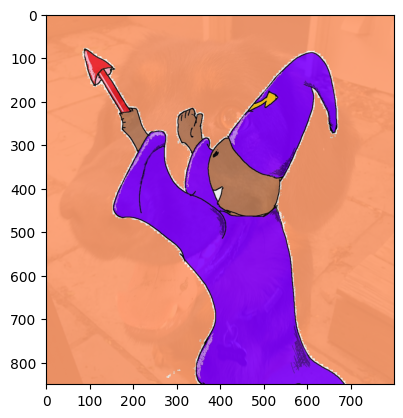

In [10]:
a=0.1
b=0.9
plt.imshow(a*P+b*L)

What happens?  Discuss what you see. Try different values for a and b and look at the output.

Changes the opacity of the images that are overlayed.

Now let's play around with color.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


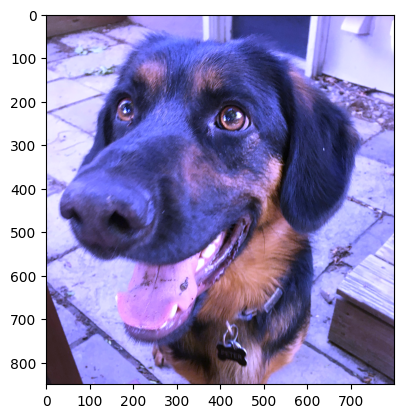

In [43]:
newP=np.copy(P) # copy is necessary so that the values aren't linked
newP[:,:,2]=2*newP[:,:,2]
plt.imshow(newP)

As a reminder, the original image looked like:

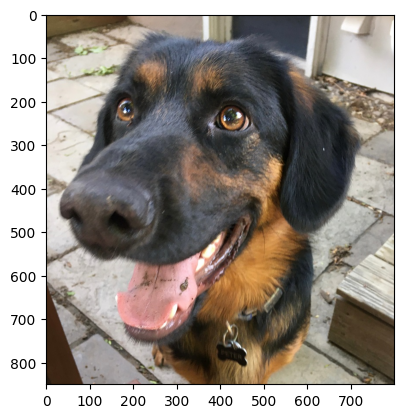

In [12]:
plt.imshow(P)

What happened?  Discuss what you see.

It appears that the blue channel had its values doubled.  This made the image appear more blue.

Let's repeat the same modification.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


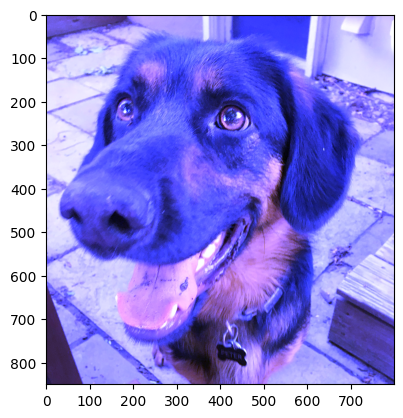

In [13]:
newP[:,:,2]=2*newP[:,:,2]
plt.imshow(newP)

Again, discuss what happened.

Matrix-Vector and Matrix-Matrix Multiplication

Now, we tease matrix-vector multiplication, which we will learn this week in class.  Note that mathematically, our vectors need to be shaped for these operations to be well-defined, but Python handles things a bit differently.  We will also discuss this in lecture.

Also note that * IS NOT matrix / matrix-vector multiplication in Python!!!!!!!  This is a different operation all together.  The correct operator is @.

We start by multiplying a 2x2 matrix C times a vector b1 with 2 entries.

In [14]:
C=np.array([[1,2],[3,4]])
b1=np.array([1,1])

print(C@b1)

[3 7]


Let's try a different vector b2.

In [15]:
b2=np.array([-1,1])

print(C@b2)

[1 1]


Now let's make a 2x2 matrix B which has as its first column b1 and its second column b2. We will use transpose to acheive this. 

We will multiply CB.

In [16]:
B=np.transpose(np.array([b1,b2]))
print("B is\n",B)
print("CB is\n",C@B)


B is
 [[ 1 -1]
 [ 1  1]]
CB is
 [[3 1]
 [7 1]]


What is the relationship between CB and Cb1 and Cb2?  Discuss.

What happens when we try to multiply the 2x2 C times a 3x1 vector?

In [17]:
C@np.random.rand(3)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

Note that we get an error.  This is because mathematically, this operation is not defined.

Switching gears, we now re-enter the adjacency matrix of the graph from lecture and Lab 2.  (See the image on DSCI369_Sp24_Lab2.pdf to refresh your memory.)

In [18]:
A = np.array([[0, 1, 0, 0, 1, 0], [1, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 1], [1, 1, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0]])
print(A)

[[0 1 0 0 1 0]
 [1 0 1 0 1 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 1]
 [1 1 0 1 0 0]
 [0 0 0 1 0 0]]


Now we multiply the adjacency matrix times the vector of all ones with six entries.

In [19]:
A@np.ones(6)

array([2., 3., 2., 3., 3., 1.])

Look at the picture of the graph.  What does that list of numbers tell us about the graph?

Now we compute A times A.  This should look familiar.

In [20]:
A@A

array([[2, 1, 1, 1, 1, 0],
       [1, 3, 0, 2, 1, 0],
       [1, 0, 2, 0, 2, 1],
       [1, 2, 0, 3, 0, 0],
       [1, 1, 2, 0, 3, 1],
       [0, 0, 1, 0, 1, 1]])

What are we looking at?  Where have we seen this before?

Exercises

1. a. Modify the Lineum picture to half the amount of red.


In [44]:
newL=np.copy(L)
newL[:,:,0]=0.5*newL[:,:,0]

b. Now visualize the new image.


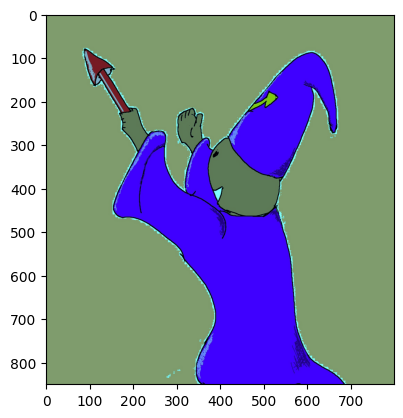

In [45]:
plt.imshow(newL)

c. Now take the modified image and double the amount of green.


In [46]:
newL[:,:,1]=2*newL[:,:,1]

d. Now visualize the new image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


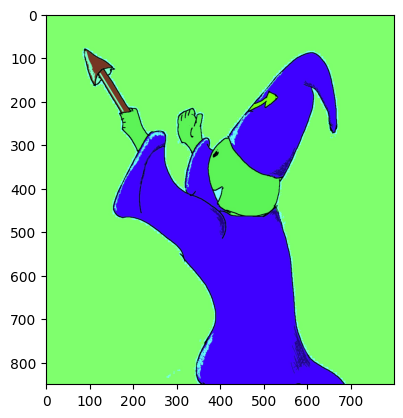

In [47]:
plt.imshow(newL)

2. a. Take the adjacency matrices A1, A2, and A3 that you created for Lab 3 and reinput them here.


In [48]:
A1 = np.array([[0,1,0],[1,0,1],[0,1,0]])
A2 = np.array([[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]])
A3 = np.array([[0,1,0,0,1],[1,0,1,0,0],[0,1,0,1,0],[0,0,1,0,1],[1,0,0,1,0]])

b. Multiply each of them on the right by all-ones column vectors that have the same number of entries as vertices in the corresponding graph.


In [52]:
A1@np.ones(3)

array([1., 2., 1.])

In [50]:
A2@np.ones(4)

array([3., 3., 3., 3.])

In [51]:
A3@np.ones(5)

array([2., 2., 2., 2., 2.])

c. Interpret the outputs.

The resulting vectors from these operations have the same entries as the top-left to bottom-right diagonal line from the squared matrices in lab 2.  This means that the entries of the vectors must represent the paths of length 2 that lead from a vertex back to itself.  In other words, this tells you how many other vertices are connected to a particular vertex.
